# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     880.5
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.28e-40
Time:                        14:13:58   Log-Likelihood:                0.31845
No. Observations:                  50   AIC:                             7.363
Df Residuals:                      46   BIC:                             15.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0135      0.085     58.679      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.52635121  5.0143707   5.4612213   5.83792344  6.1259561   6.32029982
  6.43026133  6.47794451  6.49461878  6.51558163  6.57435932  6.69719864
  6.89875459  7.17968267  7.52653113  7.91395108  8.30886123  8.67588306
  8.98315341  9.20755949  9.33853627  9.37980229  9.34874867  9.27358185
  9.18868931  9.12898984  9.12419646  9.19393466  9.34451798  9.56791073
  9.84304823 10.13929764 10.4214909  10.65570273 10.81482442 10.88301777
 10.85831722 10.75295279 10.59134076 10.40607209 10.23255787 10.10321132
 10.04212245 10.0611001  10.15773179 10.31578009 10.50785039 10.69989173
 10.85679129 10.94814335]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.9414452  10.79522825 10.53034548 10.19431824  9.8497013   9.55876734
  9.36826034  9.29795111  9.33579663  9.44088866]


## Plot comparison

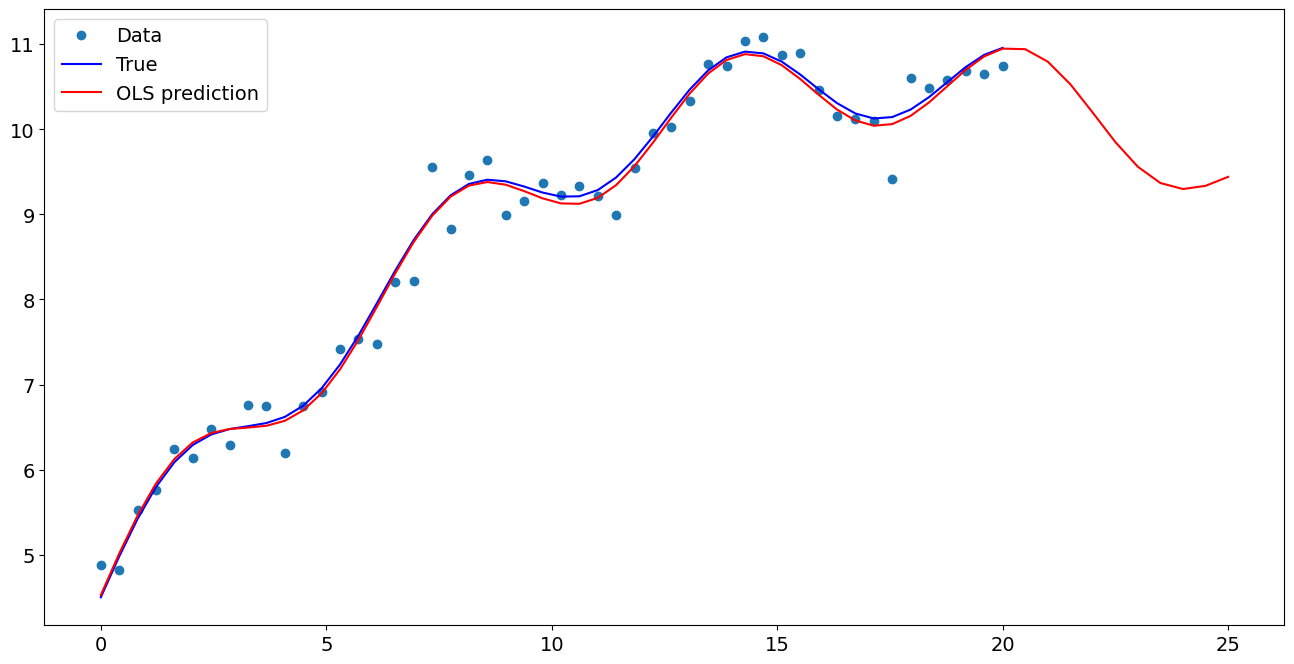

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.013453
x1                  0.491658
np.sin(x1)          0.531744
I((x1 - 5) ** 2)   -0.019484
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.941445
1    10.795228
2    10.530345
3    10.194318
4     9.849701
5     9.558767
6     9.368260
7     9.297951
8     9.335797
9     9.440889
dtype: float64